In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from pandas_datareader.data import DataReader
import seaborn as sns
# from PIL import image
import streamlit as st
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start='12/01/2020'
end='12/12/2020'
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
company_list = [AAPL, GOOG, MSFT, AMZN]
# company_list = [AAPL]
company_name = ["APPLE", "GOOG" , "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

2021-03-16 15:56:19.884 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


2021-03-16 15:56:26.115 WARNING root: 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


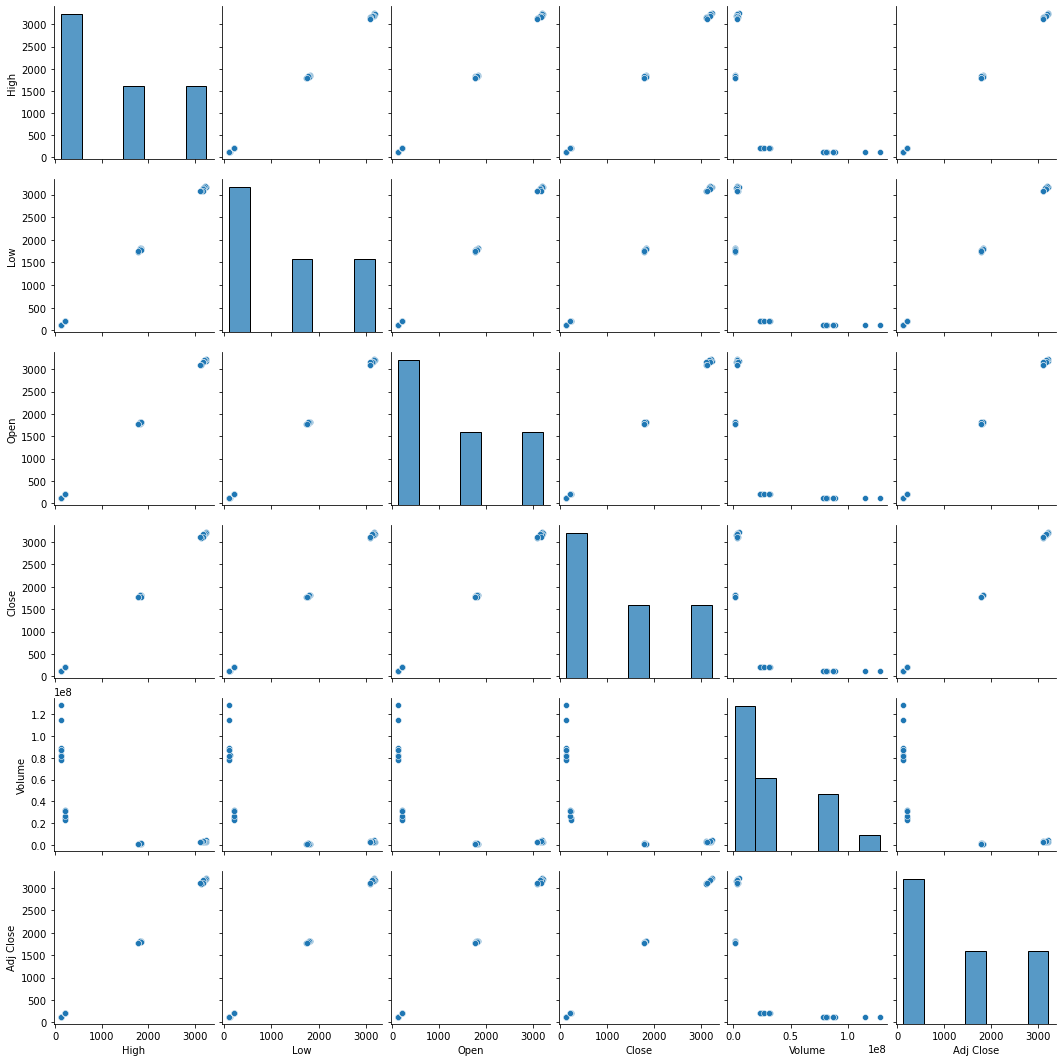

In [3]:
if st.checkbox("Seaborn Pairplot",value=True):
    fig = sns.pairplot(df) 
    st.pyplot(fig)

<AxesSubplot:>

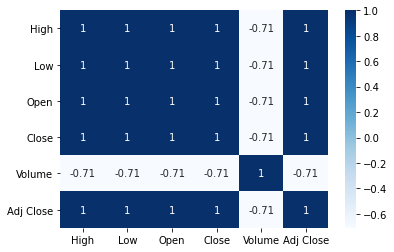

In [4]:
fig=sns.heatmap(df.corr(),cmap = 'Blues', annot=True)
st.pyplot(fig)

In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000
mean,1337.703047,1312.190224,1325.126100,1325.638889,3.086014e+07,1325.470086
std,1282.772995,1258.418904,1272.076671,1270.426808,3.812458e+07,1270.582118
min,122.760002,120.010002,120.500000,121.779999,1.096300e+06,121.598289
25%,191.297501,187.605000,188.670002,188.985003,2.498225e+06,188.575794
50%,999.315033,976.984970,989.110031,995.769981,1.391425e+07,995.521568
75%,2165.067444,2135.192535,2140.637512,2146.364990,4.389555e+07,2146.364990
max,3248.949951,3181.310059,3221.649902,3220.080078,1.281668e+08,3220.080078


In [ ]:
st.subheader('Data Information')

In [4]:
# chart=st.bar_chart(df)


2021-03-15 01:41:44.794 WARNING root: 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


<function streamlit.delta_generator.DeltaGenerator.__getattr__.<locals>.wrapper(*args, **kwargs)>

In [11]:
# df.drop('Date',axis=0)
# x=df.iloc[0:,0:5]
# y=df.iloc[:,-2]
X=df[['High','Low','Open','Close','Volume']]
Y=df['Adj Close']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)


In [32]:
from sklearn.linear_model import LinearRegression
def user_imput():
    High=st.sidebar.slider('High',0,187,42)
    Low=st.sidebar.slider('Low',0,137,99)
    Open=st.sidebar.slider('Open',0,122,56)
    Close=st.sidebar.slider('Close',0,122,56)
    Volume=st.sidebar.slider('Volume',0,122,56)
    
    user_data={'High':High,
               'Low':Low,
               'Open':Open,
               'Close':Close,
               'Volume':Volume
              }

    features = pd.DataFrame(user_data,index=[0])
    return features
user_input=user_imput()
st.subheader('User Input')
st.write(user_imput)
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(Y_train)
# Cls = RandomForestClassifier()
Cls = LinearRegression()
# Cls.fit(X_train,training_scores_encoded)
Cls.fit(X_train,Y_train)



LinearRegression()

In [27]:
pred = Cls.predict(X_test)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, pred))


0.024541500114808476


Text(0, 0.5, 'Predicted Y')

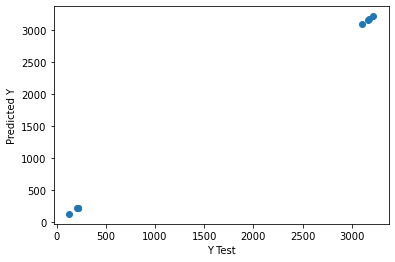

In [28]:
import matplotlib.pyplot as plt
pred = Cls.predict(X_test)
pred

plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#store the prediction
st.subheader('Coeffecient:  ')
prediction = Cls.predict(user_input)
coeffecients = pd.DataFrame(Cls.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
st.write(coeffecients)

,Coeffecient
High,2.294686e-03
Low,-3.392577e-03
Open,-1.948112e-03
Close,1.003173e+00
Volume,2.326173e-09


In [35]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

NameError: name 'datetime' is not defined